In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# experiment_name = 'mnist'
experiment_name = 'cifar10'
possible_k = {'mnist':[3, 4, 5, 6], 'cifar10':[2,3,4,5]}

# default 1233 for mnist, 1234 for cifar10
SEED = 1234

CANONICAL_NUM = {'mnist':4, 'cifar10':3}
INTERPOLATE = False
ROUNDS = [0, 20, 50, 200]
N_TASKS = {'mnist':100, 'cifar10':80}

PATH = f'../logs/{experiment_name}/Fedpop_'

In [7]:
plt.style.use('seaborn-paper')
import matplotlib
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['figure.figsize'] = [6.4, 4]

In [8]:
import os 
import pickle 

def rearrgement_matrix(path):
    matrix = np.load(path)

    with open(os.path.join(os.path.dirname(path), 'task_id_map.pkl'), 'rb') as f:
        task_to_client = pickle.load(f)

    matrix = matrix[[task_to_client[task_id] for task_id in range(N_TASKS[experiment_name])]]

    with open(f'../data/{experiment_name}/client_index.pkl', 'rb') as f:
        data_to_task = pickle.load(f)
    matrix = matrix[[data_to_task[data_id] for data_id in range(N_TASKS[experiment_name])]]
    return matrix

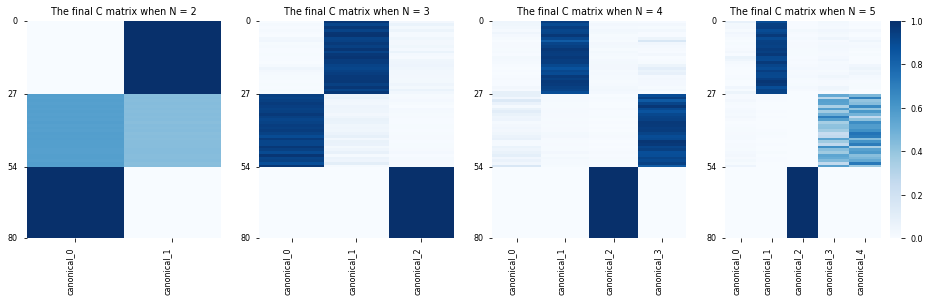

In [9]:
import seaborn as sns

if experiment_name == 'mnist':
    y_ticks = [0, 25, 50, 75, 100]
else:
    y_ticks = [0, 27, 54, 80]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

for i, k in enumerate(possible_k[experiment_name]):
    k_path = PATH + str(k)
    if k == 4:
        k_path += '_1234'
    else:
        k_path += f'_{SEED}'
    matrix = rearrgement_matrix(os.path.join(k_path, 'round_200.npy'))
    if i != len(possible_k[experiment_name]) - 1:
        sns.heatmap(data=matrix, cmap='Blues', xticklabels=[f'canonical_{i}' for i in range(k)], ax=axes[i], cbar=False)
    else:
        sns.heatmap(data=matrix, cmap='Blues', xticklabels=[f'canonical_{i}' for i in range(k)], ax=axes[i], cbar=True)
    axes[i].set_title(rf'The final C matrix when N = {k}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, horizontalalignment='right')
    axes[i].set_yticks(y_ticks)
    axes[i].set_yticklabels(y_ticks)


#plt.savefig('compare_mnist.pdf', dpi=1200, bbox_inches='tight')
plt.savefig(f'compare_{experiment_name}.pdf', dpi=1200, bbox_inches='tight')